#### Código para extração de atributos referentes aos artigos advindos da pesquisa bibliométrica.


Existem alguns atributos que gostaríamos de saber, sendo eles:
- (OK) Quantidade de publicações por ano
- (OK) Top n autores da área
- (OK) Média de autores por trabalho
- (OK) Trabalhos mais citados
- (OK) Trabalhos mais citados divididos pela "idade"
- (OK) Top n veículos da área
- (OK) Keywords mais utilizadas
- (OK) Keywords mais utilizadas por ano
- (OK) Evolução de determinada keyword ao longo do tempo
- (O) Co-ocorrências de keywords (2-2 e 3-3)

- () Países que estão com maiores contribuições
- () Interações entre grupos de estudos dos países
- () Top organizações com maiores contribuições

# IMPORTS

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
from collections import Counter
pd.set_option('display.max_rows', 300)

# LOAD DATAFRAME

In [2]:
def load_dataframe():
    return pd.ExcelFile("dataframe_only_useful.xls").parse(0, index_col=0)

df = load_dataframe()

n = 10
n_small = 5
n_huge = 20

column = 'keywords'
df.columns

Index(['title', 'author', 'journal', 'year', 'source', 'pages', 'volume',
       'abstract', 'document_type', 'doi', 'url', 'affiliation',
       'author_keywords', 'keywords', 'publisher', 'note', 'status',
       'citations', 'bkw'],
      dtype='object')

***
### Manipular dados

In [3]:
# primeiro cria uma lista com os valores da coluna author, 
# para cada elemento dessa lista, aplicar um split na keyword 'and'
# para cada item da lista criada pelo split, aplicar strip para remover espaços em branco
# aplicar contagem através de um map e finalmente somar
l = df.author.str.split(' and ').map(lambda x : [s.strip() for s in x]).map(Counter).sum()
aux = l.keys()
l_keys = []
l_count = []
for i in aux:
    l_keys.append(i)
    l_count.append(l[i])
d = {'Autores': l_keys, 'Qtde_pub': l_count}
dfaux = pd.DataFrame(d)
#l.most_common(10)

df_author = df[['author']]

#### Métodos auxiliares

In [4]:
def plot_pie (x, labels, title, ax):
    #ax.set_title(title)
    #ax.set_ylabel(y_label)
    #ax.plot(x, y)
    #ax.margins(x=0, y=0)
    #ax.figure(figsize=(14, 5))
    ax.pie(x, labels=labels, shadow=True, autopct='%.2f%%')
    ax.set_title(title)
    #ax.legend()

In [5]:
def autolabel(rects, ax, xpos='center', ydesl = 0):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height - ydesl),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom')

In [6]:
def plot_bar (x, y, x_label, y_label, title, ax, offset = 0, vertical = False):#(x, y, ax, title, y_label):
    #ax.set_title(title)
    #ax.set_ylabel(y_label)
    #ax.plot(x, y)
    #ax.margins(x=0, y=0)
    '''
    plt.figure(figsize=(14, 5))
    plt.bar(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    '''
    #fig, ax = plt.subplots()
    ind = np.arange(len(x))
    width = 0.6
    
    rects = ax.bar(ind, y, width, label = x_label)

    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(ind)
    rotation = 90 if vertical else 0
    #ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation)
    ax.set_xticklabels(x, rotation=rotation)
    ax.legend()
    
    autolabel(rects, ax, ydesl = offset)
    
    #fig.tight_layout()
    #plt.show()
    return ax

In [7]:
def autolabel_H(rects, ax, xpos='center', ydesl = 0):
    """
    Attach a text label besides each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        width = int(rect.get_width())
        yloc = rect.get_y() + rect.get_height() / 2
        ax.annotate('{}'.format(width),
                    xy=(width, yloc),
                    xytext=(6 + ydesl, -1),
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='center')

In [8]:
def plot_H_bar (x, y, x_label, y_label, title, ax, offset = 0):#(x, y, ax, title, y_label):
    #ax.set_title(title)
    #ax.set_ylabel(y_label)
    #ax.plot(x, y)
    #ax.margins(x=0, y=0)
    #fig, ax = plt.subplots(figsize=(15, 8))
    y_pos = np.arange(len(x))
    width = 0.6
    #x = autores, y = quantidade

    rects = ax.barh(y_pos, y, width, label=x_label)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(x)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel(y_label)
    ax.set_title(title)

    
    autolabel_H(rects, ax, ydesl=offset)
    
    #fig.tight_layout()
    #plt.show()
    return ax

In [9]:
def plot_2_H (x1, y1, x1l, y1l, t1, x2, y2, x2l, y2l, t2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 8)) 
    y_pos = np.arange(len(x1))
    width = 0.6
    #x = autores, y = quantidade

    rects1 = ax1.barh(y_pos, y1, width, label=x1l)
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels(x1)
    ax1.invert_yaxis()  # labels read top-to-bottom
    ax1.set_xlabel(y1l)
    ax1.set_title(t1)

    
    autolabel_H(rects1, ax1)
    
    #fig.tight_layout()
    
    
    #segundo
    #fig, ax = plt.subplots(1,2,2,figsize=(10, 8))
    y_pos = np.arange(len(x2))
    width = 0.6
    #x = autores, y = quantidade

    rects2 = ax2.barh(y_pos, y2, width, label=x2l)
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels(x2)
    ax2.invert_yaxis()  # labels read top-to-bottom
    ax2.set_xlabel(y2l)
    ax2.set_title(t2)

    
    autolabel_H(rects2, ax2, ydesl=3)
    
    fig.tight_layout()
    
    plt.show()

In [10]:
def cria_dict_coocorrencias(lists):
    dict = {}
    for l in lists:
        #print('\n\n\n', l)
        while len(l) > 1:
            aux = l.pop(0)
            for i in l:
                #print(aux, '  -  ', i, '  -  ', l)
                lst = [aux, i]
                lst.sort()
                key = tuple(lst)
                if key not in dict:
                    dict[key] = 1
                else:
                    dict[key] += 1
            #print(dict)
    return dict

In [11]:
df.columns

Index(['title', 'author', 'journal', 'year', 'source', 'pages', 'volume',
       'abstract', 'document_type', 'doi', 'url', 'affiliation',
       'author_keywords', 'keywords', 'publisher', 'note', 'status',
       'citations', 'bkw'],
      dtype='object')

***
# Cálculo das métricas

## Journal vs Proceedings

In [12]:
def plot_document_type(dataframe, ax):
    pizza = dataframe[['document_type','title']]
    lst = pizza.groupby('document_type').count()
    print(lst)
    values, axis = (list(lst.title), ['Journal', 'Proceedings'])
    ax = plot_pie(values, axis, 'Journal and Proceedings', ax)
    return ax

## Quantidade de publicações por ano

In [13]:
def plot_qtde_artigos_por_ano(ax):
    qtde_artigos = df.groupby('year').count().title
    tempo = list(range(2009,2020))
    
    showdata = pd.DataFrame.from_records(zip(tempo,qtde_artigos), columns = ['Ano', 'Publicações'])
    print(showdata)
    
    ax = plot_bar(tempo, qtde_artigos.iloc[0:,],
                  'Year', 'Number of publications',
                  'Number of Publications by Year', 
                  ax, offset = 10)
    ax.get_legend().remove()
    return ax

## Artigos por autor

In [14]:
def plot_topn_autores_da_area(dataframe, qtde_autores, ax):
    final_df = dataframe.sort_values(by=['Qtde_pub'], ascending=False)
    df_top_n_autores= final_df.head(qtde_autores)
    
    showdata = pd.DataFrame.from_records(zip(df_top_n_autores.Autores,df_top_n_autores.Qtde_pub),
                                         columns = ['Autores', 'Publicações'])
    print(showdata)
    #return (df_top_n_autores.Autores,df_top_n_autores.Qtde_pub, 'Authors', 'Number of papers', 'Top %s authors in area' % str(qtde_autores))
    #plot_bar(df_top_n_autores.Autores,df_top_n_autores.Qtde_pub, 'Authors', 'Number of papers', 'Top %s authors in area' % str(qtde_autores))
    ax = plot_H_bar(df_top_n_autores.Autores,df_top_n_autores.Qtde_pub, 'Authors', 'Number of papers', 'Top %s authors in area' % str(qtde_autores), ax, offset=1)
    return ax

## Média de autores por artigo
No código abaixo posso saber a quantidade média e máxima de autores por artigo.

In [15]:
def plot_media_autores_por_artigo(dataframe):
    teste=dataframe['author'].str.split(' and ').tolist()
    list_qtde_autores=[]
    for i in range(len(teste)):
        list_qtde_autores.append(len(teste[i]))
    print ("=========================================================")
    print ("Média de autores por artigo ", np.mean(list_qtde_autores))
    print ("Máximo de autores por artigo ", np.max(list_qtde_autores))
    print ("\n\n")

***
## Quantidade de citações

In [16]:
def plot_citacoes_normalizadas(data, n):
    current_year = 2019
    data['age'] = 1 + current_year - data['year']
    data['citations_per_year'] = data['citations']/data['age']
    data.loc[:, 'citations_per_year'] = data['citations_per_year'].apply(lambda x : float(x))
    data_cit = data[['title', 'citations_per_year', 'citations', 'age']]
    print(data_cit.dtypes)
    print(data_cit.sort_values(by=['citations_per_year'], ascending=False).head(n))
    print("\n")

In [17]:
def plot_quantidade_de_citacoes(data, n):
    data = df[['title', 'citations', 'year']]
    print ("=========== Quantidade de Citações ===========")
    print(data.sort_values(by=['citations'], ascending=False).head(n))
    print("\n\n")
    print("=========== Citações Normalizadas por idade =============")
    plot_citacoes_normalizadas(data, n)
    print("\n\n\n")

In [18]:
def plot_autores_mais_citados(data, n, ax):
    data = data[['author', 'citations']]
    #cria dict para acumular as citações dos autores
    dic = {}
    list_authors = data.author.str.split(' and ').map(lambda x : [s.strip() for s in x]).map(Counter).sum()
    for l in list_authors: dic[l] = 0
    # cria a lista de autores na coluna author
    data.loc[:,'author'] = data.author.str.split(' and ').map(lambda x : [s.strip() for s in x if s != ''])
    #remove linhas onde a quantidade de citações é 0
    data = data.loc[data.citations > 0]
    #add citações no dict
    serauth = data.author.values
    sercit = data.citations.values
    for author in dic:
        for i in range(0, len(serauth)):
            if author in serauth[i]:
                dic[author] += sercit[i]
    #cria lista com as tuplas em ordem decrescente de citações
    s = [k for k in sorted(dic.items(), key=lambda x:x[1], reverse=True)]
    #create lists used in graph
    l_author = []
    l_cit = []
    for i in range(0, n):
        l_author.append(s[i][0])
        l_cit.append(s[i][1])
        
    showdata = pd.DataFrame.from_records(zip(l_author,l_cit), columns = ['Autores', 'Citações'])
    #print(df_top_n_autores)
    print(showdata)
    #return (l_author, l_cit, 'Author', 'Citations', 'Authors with highest citations')
    ax = plot_H_bar(l_author, l_cit, 'Author', 'Citations', 'Authors with highest citations', ax, offset = 5)
    return ax

***
## Artigos por veículo de publicação
Código responsável por contar quantos artigos foram publicados em um determinado veículo de publicação. Dessa forma podendo apresentar os tops n veículos de publicação

In [19]:
def get_dataframe_top_veiculos(dataframe,qtde_plots):
    qtde_artigos = dataframe.groupby('publisher').count().title
    qtde_artigos
    t = qtde_artigos.to_frame()
    print ("============== Top Veículos de Publicação ==============")
    print (t.sort_values(by=['title'], ascending=False).head(qtde_plots))
    print("\n\n\n")

***
## Keywords mais utilizadas

In [20]:
#se não passar nenhum ano, faz geral
def plot_keywords_mais_utilizadas(dataframe, qtde_words, year = ''):
    year = 'all years' if year == '' else 'year %s' % year
    coluna = 'keywords'
    df3 = dataframe[pd.notnull(df[coluna])]
    list_keywords=df3[coluna].str.split(';')#.map(Counter).sum()
    lista = []
    for i in list_keywords:
        for k in i:
            lista.append(k.strip())

    count_keyword = Counter(lista)
    keywords_mais_utilizadas = count_keyword.most_common(qtde_words)
    lista_aux = []
    for i in keywords_mais_utilizadas:
        palavra= i[0]
        qtde_times=i[1]
        lista_aux.append([palavra,qtde_times])
    df_aux = pd.DataFrame(lista_aux, columns =['keyword', 'qtde'])
    print ("======== Keywords mais utilizadas  " + year + " ========")
    print (df_aux)
    print("\n\n")

In [21]:
def plot_keywords_mais_utilizadas_por_ano(dataframe, n):
    data = dataframe[['year', 'keywords']]
    years = list(range(2009,2019))
    #l = data['year'].unique().tolist()
    #l.sort()
    for y in years:
        plot_keywords_mais_utilizadas(data.loc[data.year == y], n, y)
    print("\n")

In [22]:
#keywords mais utilizadas ano a ano a patir do ano sy
def keyword_usage_by_year(dataframe, kw, sy, ax, offset = 0, vertical = False, returndata = False, column = 'keywords'):
    number_of_times = []
    #print(kw)
    years = list(range(sy, 2020))
    for year in years:
        # get df with only that year
        daux = dataframe.loc[dataframe.year == year]
        # count number of times keyword appeared
        # split on ; returns a df with a list, then apply a map which is a list comprehension
        # strip and make all characters lowercase, then count and sum up by key and retrieve the wanted kw sum
        count = daux[column].str.split(';').map(lambda x : list(set([s.strip().lower() for s in x]))).map(Counter).sum()[kw.lower()]
        # save to a list
        number_of_times.append(count)
    if returndata:
        return (years, number_of_times, kw.title())
    # plot graph
    ax = plot_bar(years, number_of_times, 'Year', 'Ocurrences of \'%s\'' % kw.title(), "Evolution in keyword occurrence by year.", ax, offset=offset, vertical = vertical)
    return ax

In [23]:
#se não passar nenhum ano, faz geral
def keywords_coocurrences(dataframe, kw1, kw2, year = '', print_str = True):
    year = 'all years' if year == '' else 'year %s' % year
    lst = [kw1.lower(), kw2.lower()]
    lst.sort()
    key = tuple(lst)
    data = dataframe[['title', 'keywords']].dropna()
    lists = data[column].str.split(';').map(lambda x : list(set([s.strip().lower() for s in x if s != ''])))
    #create tuples containing all possible sets  of keywords from each item
    d = cria_dict_coocorrencias(lists)
    #print("keywords_coocurrences\n",d)
    if print_str:
        print("As keywords \'%s\' e \'%s\' aparecem juntas em %d trabalhos do(s) ano(s) %s.\n\n" % 
          (kw1.title(), kw2.title(), d[key], year))
    return d[key]

In [24]:
#se não passar nenhum ano, faz geral
def keywords_coocurrences_top_n(dataframe, n, year = ''):
    year = 'all years' if year == '' else 'year %s' % year
    data = dataframe[['title', 'keywords']].dropna()
    lists = data[column].str.split(';').map(lambda x : list(set([s.strip().lower() for s in x if s != ''])))
    #create tuples containing all possible sets  of keywords from each item
    d = cria_dict_coocorrencias(lists)
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    print("===== Top %d coocorrências %s =====" % (n, year))
    for i in range(0, n+1):
        print("(\'%s\', \'%s\')  -  %d" % (s[i][0][0].title(), s[i][0][1].title(), s[i][1]))
    print('\n\n')

In [25]:
# coocorrencias de keywords ano a ano a patir do ano sy
def keywords_coocurrences_by_year(dataframe, kw1, kw2, sy, ax = None, returnResult = False):
    years = list(range(sy, 2020))
    coocu = []
    for year in years:
        # get df with only that year
        daux = dataframe.loc[dataframe.year == year]
        # calls general method
        coocu.append(keywords_coocurrences(daux, kw1, kw2, year, False))
    if returnResult:
        return coocu, kw1, kw2
    ax = plot_bar (years, coocu, 'Year', 'Coocurrences', "Coocurrences of \'%s\' and \'%s\' by year" % (kw1.title(), kw2.title()), ax)
    return ax

In [26]:
#top n coocorrencias de keywords ano a ano a patir do ano sy
def keywords_coocurrences_top_n_by_year(dataframe, n, sy):
    years = list(range(sy, 2020))
    for year in years:
        # get df with only that year
        daux = dataframe.loc[dataframe.year == year]
        # calls general method
        keywords_coocurrences_top_n(daux, n, year)

***
### Plotar gráficos e apresentar tabelas

In [27]:
df.columns

Index(['title', 'author', 'journal', 'year', 'source', 'pages', 'volume',
       'abstract', 'document_type', 'doi', 'url', 'affiliation',
       'author_keywords', 'keywords', 'publisher', 'note', 'status',
       'citations', 'bkw'],
      dtype='object')

In [28]:
print(len(df))
df_authoransnda = df['author_keywords'].dropna()
print(len(df_authoransnda))

3292
2771


               title
document_type       
article         1078
conference      2214
     Ano  Publicações
0   2009          268
1   2010          226
2   2011          176
3   2012          196
4   2013          211
5   2014          226
6   2015          276
7   2016          340
8   2017          491
9   2018          652
10  2019          230


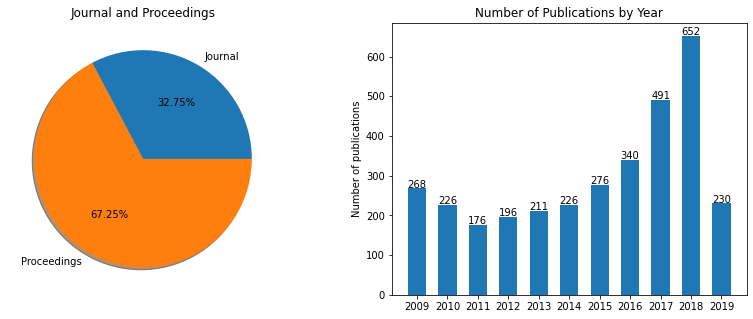

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
plot_document_type(df, ax1)
plot_qtde_artigos_por_ano(ax2)

plt.show()
fig.savefig('document_type_AND_number_papers.eps', format='eps', bbox_inches='tight')

In [30]:
#plot_topn_autores_da_area(dfaux, n_huge)
plot_media_autores_por_artigo(df_author)
#get_dataframe_top_veiculos(df, n)

Média de autores por artigo  3.212636695018226
Máximo de autores por artigo  27





               Autores  Publicações
0             Wang, Y.           31
1              Liu, Y.           27
2             Wang, H.           27
3            Zhang, Y.           21
4             Wang, J.           18
5             Chen, X.           18
6        Callegari, C.           17
7             Wang, X.           17
8               Li, Y.           16
9         Giordano, S.           16
10              Li, W.           16
11          Pagano, M.           16
12           Zhang, J.           16
13            Mabu, S.           15
14  Poornachandran, P.           15
15        Hirasawa, K.           14
16            Wang, C.           14
17           Zhang, X.           14
18            Wang, W.           14
19            Chen, Z.           13


/home/cassales/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


                 Autores  Citações
0        Ghorbani, A. A.       795
1                 Lu, W.       768
2       Díaz-Verdejo, J.       657
3     García-Teodoro, P.       657
4    Maciá-Fernández, G.       657
5            Vázquez, E.       654
6           Tsai, C. -F.       593
7          Tavallaee, M.       552
8            Bagheri, E.       552
9            Lin, C. -Y.       508
10  Bhattacharyya, D. K.       491
11            Sommer, R.       474
12            Paxson, V.       474
13         Kalita, J. K.       437
14         Bhuyan, M. H.       401
15           Liu, C. -C.       390
16                Hu, J.       370
17           Hsu, Y. -F.       325
18           Lin, W. -Y.       325
19          Anuar, N. B.       287


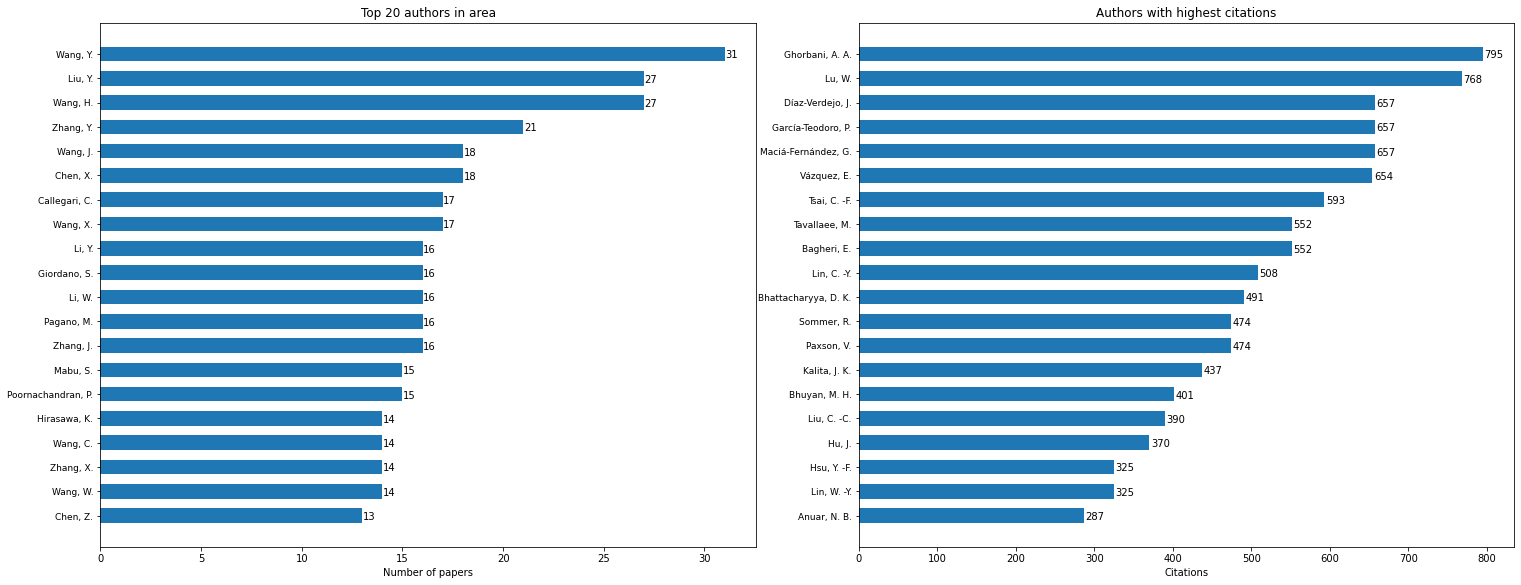

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 8))
ax1 = plot_topn_autores_da_area(dfaux, n_huge, ax1)
ax2 = plot_autores_mais_citados(df, n_huge, ax2)

for tick in ax1.yaxis.get_major_ticks():
    tick.label.set_fontsize(9)

for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(9)

plt.tight_layout(pad=0.25)
plt.show()
fig.savefig('authors_pub_AND_cit.eps', format='eps', bbox_inches='tight')

In [32]:
plot_quantidade_de_citacoes(df, n)

=========== Quantidade de Citações ===========
                                                                  title  \
bibtex_key                                                                
García-Teodoro200918  Anomaly-based network intrusion detection: Tec...   
5356528                  A detailed analysis of the KDD CUP 99 data set   
Sommer2010305         Outside the closed world: On using machine lea...   
Bhuyan2014303         Network anomaly detection: Methods, systems an...   
Tsai200911994         Intrusion detection by machine learning: A review   
7307098               A Survey of Data Mining and Machine Learning M...   
Horng2011306          A novel intrusion detection system based on hi...   
Sayed2014311          Adaptation, learning, and optimization over ne...   
Ten2010853            Cybersecurity for critical infrastructures: At...   
Ahmed201619            A survey of network anomaly detection techniques   

                      citations  year  
bibtex_key  

<ipython-input-16-0072a52d6087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age'] = 1 + current_year - data['year']
<ipython-input-16-0072a52d6087>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['citations_per_year'] = data['citations']/data['age']
/home/cassales/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [33]:
df.columns

Index(['title', 'author', 'journal', 'year', 'source', 'pages', 'volume',
       'abstract', 'document_type', 'doi', 'url', 'affiliation',
       'author_keywords', 'keywords', 'publisher', 'note', 'status',
       'citations', 'bkw'],
      dtype='object')

In [34]:
plot_keywords_mais_utilizadas(df, n)
# plot_keywords_mais_utilizadas_por_ano(df, n_small)

======== Keywords mais utilizadas  all years ========
                      keyword  qtde
0         Intrusion detection  2213
1            Network security  1070
2              Computer crime  1062
3  Intrusion Detection System  1030
4            Learning systems   873
5                 Data mining   831
6           Anomaly detection   793
7     Artificial intelligence   560
8         Learning algorithms   390
9          Feature extraction   307





starting_year = 2009
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(14,6))

keyword = "LeaRniNg sYstems"
ax1 = keyword_usage_by_year(df[['keywords','year']].dropna(), keyword, starting_year, ax1, offset=2, vertical=True)

keyword = 'data stream'
ax2 = keyword_usage_by_year(df[['keywords','year']].dropna(), keyword, starting_year, ax2, offset=0, vertical=True)

keyword = 'intrusion detection'
ax3 = keyword_usage_by_year(df[['keywords','year']].dropna(), keyword, starting_year, ax3, offset=0, vertical=True)


plt.show()
fig.savefig('keywords.eps', format='eps', bbox_inches='tight')

In [35]:
## Nova função que leva em consideração 'todos keywords', título e abstract
#keywords mais utilizadas ano a ano a patir do ano sy
def appears_in_KTA_by_year(dataframe, kw, sy, ax, offset = 0, vertical = False, returndata = False):
    columns = ['title', 'abstract', 'bkw']
    number_of_times = []
    #print(kw)
    lkw = kw.lower()
    years = list(range(sy, 2020))
    for year in years:
        # get df with only that year
        daux = dataframe.loc[dataframe.year == year]
        # count number of times keyword appeared
        # split on ; returns a df with a list, then apply a map which is a list comprehension
        # strip and make all characters lowercase, then count and sum up by key and retrieve the wanted kw sum
        st = daux['title']
        sabst = daux['abstract'].replace(np.nan,'')
        sbkw = daux['bkw'].replace(np.nan,'')

        c = 0
#         for i in range(2):
        for i in range(len(st)):
#             print ('\n',st[i],sabst[i],'\n',sbkw[i],'\n\n')
            if lkw in st[i] or lkw in sabst[i] or lkw in sbkw[i]:
                c += 1
        
        
#         count = daux[column].str.split(';').map(lambda x : list(set([s.strip().lower() for s in x]))).map(Counter).sum()[kw.lower()]
        # save to a list
#         number_of_times.append(count)
        number_of_times.append(c)
    if returndata:
        return (years, number_of_times, kw.title())
    # plot graph
    ax = plot_bar(years, number_of_times, 'Year', 'Ocurrences of \'%s\'' % kw.title(), "Evolution in keyword occurrence by year.", ax, offset=offset, vertical = vertical)
    return ax

In [36]:
starting_year = 2009
labels = ['keyword', 'count']
keywords_novas = ['internet of thing', 'novelty detection', 'online learning', 'data stream', 'data streams',
                  'data streams with concept drift', 'cluster data streams', 'concept drift in data streams',
                  'incremental learning', 'time series', 'concept drift', 'active learning', 
                  'iterative methods', 'real time systems', 'clustream', 'denstream', 
                  'den-stream', 'vfdt', 'clustree'  #old
                 ]
#                   'intrusion detection', 'intrusion detection system', 'Network security', 'Data mining',
#                   'Learning systems', 'machine learning', 'Anomaly detection', 'artificial intelligence', 
#                   'Internet of Things (IoT)', 'data stream', 'novelty detection'  ]
KTAlist = []
KTA = df[['title', 'abstract', 'bkw', 'year']].replace(np.nan,'')

In [37]:
for k in keywords_novas:
    KTAlist.append(appears_in_KTA_by_year(KTA, k, starting_year, ax=None, returndata=True))

In [38]:
for y, c, k in KTAlist:
# for i in KTAlist:
    print(k,sum(c),c)
#     print(i)

Internet Of Thing 141 [0, 0, 0, 0, 1, 1, 0, 13, 24, 71, 31]
Novelty Detection 11 [1, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2]
Online Learning 22 [1, 1, 2, 1, 5, 2, 2, 2, 0, 5, 1]
Data Stream 94 [11, 9, 10, 8, 10, 6, 4, 9, 12, 11, 4]
Data Streams 61 [8, 3, 9, 7, 5, 4, 4, 6, 7, 6, 2]
Data Streams With Concept Drift 1 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Cluster Data Streams 1 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Concept Drift In Data Streams 2 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Incremental Learning 22 [3, 2, 1, 3, 2, 0, 2, 2, 3, 3, 1]
Time Series 43 [1, 2, 2, 1, 2, 2, 3, 7, 11, 9, 3]
Concept Drift 27 [7, 1, 1, 4, 2, 3, 1, 1, 0, 5, 2]
Active Learning 16 [2, 1, 0, 1, 1, 1, 1, 0, 6, 2, 1]
Iterative Methods 27 [2, 0, 0, 1, 3, 1, 2, 4, 4, 8, 2]
Real Time Systems 31 [1, 1, 3, 0, 2, 0, 2, 1, 6, 12, 3]
Clustream 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Denstream 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Den-Stream 0 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Vfdt 1 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
Clustree 0 [0, 0, 0, 0, 0, 0, 0, 0

In [39]:
def filtered_by(df, kw):
    return df.loc[df.title.str.contains(kw) 
                  | df.abstract.str.contains(kw) 
                  | df.bkw.str.contains(kw)]

In [40]:
def get_dict(kws):
    path = 'dfs.txt'
    f = open('kws.txt','w')
    for k in keywords_novas:
        auxdf = filtered_by(KTA,k.lower())
        f.write('\n@@@@ ' + k + ' ' + str(len(auxdf)) + '\n')
        f.write('\n'.join(list(auxdf.index.values)))
    f.close()
    lines = [x.strip() for x in open('kws.txt','r').readlines() if x != '\n']
    d = {}
    dk = ''
    for l in lines:
        if '@@@' in l:
            ls = l.split(' ')
            i = 1
            dk = ''
            while i < len(ls) and not ls[i].isnumeric() :
                dk += ' ' + ls[i]
                dk = dk.strip()
                i += 1
            d[dk] = []
        else:
            d[dk].append(l)
    return d

In [41]:
# Will get all bibtex_keys from novelty detection, online learning, concept drift, incremental learning, active learning
# Then will remove duplicates and print result
bibd = get_dict(keywords_novas)
indices = []
iot = 'internet of thing'
liot = bibd[iot]
ds = 'data stream'
lds = bibd[ds]
bibkw = ['novelty detection', 'online learning', 'concept drift', 'incremental learning', 'active learning']
list_all = []
list_iot_all = []
list_ds_all = []
for k in bibkw:
    list_iot_all.append( (iot, k, len( [x for x in bibd[k] if x in liot] )) )
    list_ds_all.append( (ds, k, len( [x for x in bibd[k] if x in lds])) )
    list_all.extend(bibd[k])
listunique = list(set(list_all))
# print('antes:',len(list_all))
# print('depois:',len(listunique))
print('total unique papers with at least 1 technique:',len(listunique))
withds= [l for l in listunique if l in lds]
withiot = [l for l in listunique if l in liot]
print('unique list with data stream:',len(withds))
print('unique list with IoT:',len(withiot))
list_iot_all

total unique papers with at least 1 technique: 91
unique list with data stream: 21
unique list with IoT: 4


[('internet of thing', 'novelty detection', 0),
 ('internet of thing', 'online learning', 1),
 ('internet of thing', 'concept drift', 0),
 ('internet of thing', 'incremental learning', 0),
 ('internet of thing', 'active learning', 3)]

In [42]:
bibd

{'internet of thing': ['Satam2019',
  '8693712',
  '8711210',
  '8711780',
  '8718717',
  '8725767',
  'Aminanto201899',
  'Shukla2018234',
  'Zhao2018836',
  'Li20192149',
  '8576178',
  '8565917',
  '8554985',
  '8532447',
  '8485464',
  '8449076',
  '8437128',
  '8407032',
  '8377943',
  '8302863',
  '8273042',
  '8215418',
  '8119425',
  '8074855',
  '8067440',
  '7930378',
  '7743900',
  '8599805',
  '7444797',
  '6933768',
  '7542329',
  '7529392',
  'Sedjelmaci2016',
  'Eliseev201667',
  'Arrington2016',
  'Indre2016175',
  'Tamani20162425',
  'Nobakht2016147',
  'Turner2017106',
  'Chaimae2017',
  'Belouch2017',
  'Meidan2017506',
  'Guo2017732',
  'Domb2017218',
  'Gunupudi2017417',
  'Conti201637',
  'Sedjelmaci20179381',
  'Kumari2017481',
  'Madhawa20181267',
  'Hashimoto2018118',
  'Diro2018124',
  'Jalaian2018',
  'Singh201811',
  'Atat201873603',
  'Anthi2018',
  'Moustafa2018',
  'Lu2018',
  'Sengupta2018',
  'Onuchowska2018',
  'Shafi201873713',
  'Mohamudally201810',


In [43]:
list_ds_all

[('data stream', 'novelty detection', 0),
 ('data stream', 'online learning', 5),
 ('data stream', 'concept drift', 17),
 ('data stream', 'incremental learning', 2),
 ('data stream', 'active learning', 1)]

In [44]:
[x for x in liot if x in lds]

[]

In [45]:
starting_year = 2009
labels = ['keyword', 'count']
# keywords_novas = ['novelty detection', 'online learning', 'data stream', 'data streams',
#                   'Data streams with concept drift', 'Cluster data streams', 'Concept Drift in Data Streams'
#                   'incremental learning', 'time series', 'concept drift', 'active learning', 
#                   'iterative methods', 'real time systems', 'clustream', 'denstream', 
#                   'den-stream', 'VFDT', 'clustree']

author = []
dfakn = df[['author_keywords','year']].dropna()
for k in keywords_novas:
    author.append(keyword_usage_by_year(dfakn, k, starting_year, ax=None, returndata=True, column='author_keywords'),)

knnn = []


In [46]:
for y, c, k in author:
    if sum(c) > 0:
        t = tuple((k,c))
        #print(t)
        knnn.append(t)
df123 = pd.DataFrame.from_records(knnn, columns=labels)

In [47]:
no_author = []
dfnakn = df[['keywords','year']].dropna()
for k in keywords_novas:
    no_author.append(keyword_usage_by_year(dfnakn, k, starting_year, ax=None, returndata=True))

In [48]:
knnn2 = []
for y, c, k in no_author:
    if sum(c) > 0:
        t = tuple((k,c))
        #print(t)
        knnn2.append(t)
df1235 = pd.DataFrame.from_records(knnn2, columns=labels)

In [49]:
df123

,keyword,count
0,Novelty Detection,"[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1]"
1,Online Learning,"[0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 1]"
2,Data Stream,"[1, 1, 1, 3, 1, 0, 0, 1, 2, 0, 2]"
3,Data Streams,"[1, 1, 1, 0, 0, 0, 0, 2, 0, 1, 1]"
4,Data Streams With Concept Drift,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
5,Cluster Data Streams,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]"
6,Concept Drift In Data Streams,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
7,Incremental Learning,"[2, 1, 1, 2, 1, 0, 2, 0, 2, 1, 1]"
8,Time Series,"[0, 0, 0, 0, 1, 1, 0, 0, 5, 1, 1]"
9,Concept Drift,"[1, 1, 1, 2, 1, 0, 0, 1, 0, 0, 1]"


In [50]:
df1235

,keyword,count
0,Novelty Detection,"[1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1]"
1,Online Learning,"[1, 0, 1, 1, 3, 0, 2, 2, 0, 2, 1]"
2,Data Stream,"[3, 3, 4, 5, 1, 2, 0, 3, 3, 1, 3]"
3,Data Streams,"[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0]"
4,Incremental Learning,"[3, 1, 1, 3, 1, 0, 2, 2, 3, 3, 0]"
5,Time Series,"[1, 1, 2, 0, 1, 0, 2, 4, 7, 4, 1]"
6,Concept Drift,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]"
7,Active Learning,"[1, 1, 0, 1, 0, 1, 1, 0, 4, 0, 0]"
8,Iterative Methods,"[2, 0, 0, 1, 3, 1, 2, 4, 4, 8, 2]"
9,Real Time Systems,"[1, 1, 3, 0, 2, 0, 2, 1, 6, 12, 3]"


In [51]:
starting_year = 2009

kws = ['intrusion detection', 'intrusion detection system', 'Network security', 'Data mining', 
       'Learning systems', 'machine learning', 'Anomaly detection', 'artificial intelligence', 
       'Internet of Things (IoT)', 'data stream', 'novelty detection'] #'internet of things'



rets = []
for kw in kws:
    rets.append(keyword_usage_by_year(df[['keywords','year']].dropna(), kw, starting_year, ax=None, returndata=True))    

In [52]:
kws_kta = ['intrusion detection', 'Network security', 'Data mining', #'intrusion detection system',
       'Learning systems', 'machine learning', 'Anomaly detection', 'artificial intelligence', 
       'Internet of Thing', 'data stream', 'concept drift', 'online learning', 'novelty detection']

rets_kta = []
for kw in kws_kta:
#     rets.append(keyword_usage_by_year(df[['keywords','year']].dropna(), kw, starting_year, ax=None, returndata=True))
    rets_kta.append(appears_in_KTA_by_year(KTA, kw, starting_year, ax=None, returndata=True))

In [53]:
for r in rets:
    print(r)

([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [219, 180, 121, 140, 135, 140, 200, 241, 323, 416, 136], 'Intrusion Detection')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [64, 74, 54, 77, 74, 77, 101, 122, 148, 202, 61], 'Intrusion Detection System')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [70, 55, 47, 41, 34, 56, 71, 112, 209, 308, 98], 'Network Security')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [77, 84, 55, 54, 44, 72, 100, 94, 121, 146, 52], 'Data Mining')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [15, 15, 12, 35, 31, 45, 85, 110, 195, 245, 85], 'Learning Systems')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [20, 11, 3, 4, 4, 2, 10, 17, 32, 60, 75], 'Machine Learning')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [96, 85, 51, 65, 53, 44, 64, 99, 107, 155, 52], 'Anomaly Detection')
([2009, 2010, 2011, 2012

In [54]:
rets_kta[7] = (rets_kta[7][0],rets_kta[7][1],'Internet of Things')
for r in rets_kta:
    print(r)

([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [259, 218, 158, 186, 188, 197, 238, 283, 379, 504, 166], 'Intrusion Detection')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [85, 65, 60, 58, 52, 77, 91, 131, 240, 337, 106], 'Network Security')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [102, 98, 73, 75, 66, 90, 115, 106, 136, 164, 56], 'Data Mining')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [15, 15, 12, 35, 33, 45, 85, 110, 198, 246, 86], 'Learning Systems')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [54, 47, 40, 56, 62, 67, 100, 143, 251, 361, 155], 'Machine Learning')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [130, 107, 77, 92, 97, 92, 106, 152, 166, 223, 75], 'Anomaly Detection')
([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], [31, 18, 8, 18, 11, 58, 100, 111, 152, 157, 31], 'Artificial Intelligence')
([2009, 2010

df = load_dataframe()

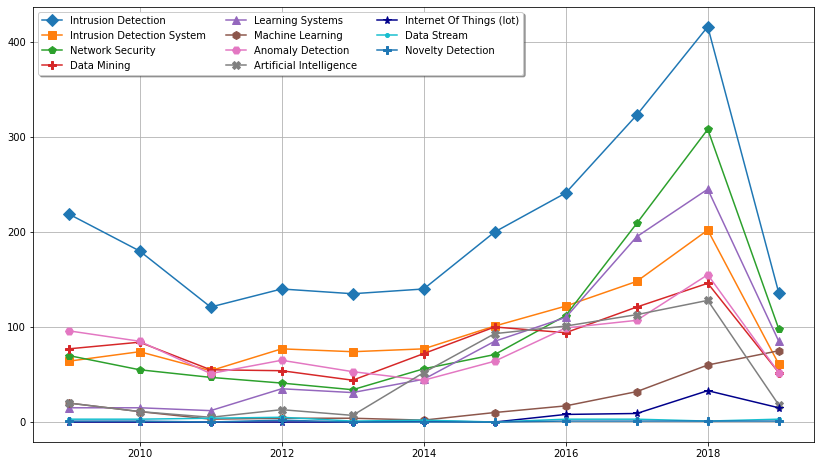

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [55]:
fig, ax = plt.subplots(figsize=(14,8))

markers = ['D', 's', 'p', 'P', '^',
          'h', 'H', 'X', '*', '.', 'P', '|']

lines = []
mid = 0
for year, number, kw in rets:
    line, = ax.plot(year, number, label=kw, marker=markers[mid], markersize=8.0)
    lines.append(line)
    mid+=1

lines[8].set_color("darkblue")
ax.legend(loc='upper left', ncol=3, fancybox=True, shadow=True)
ax.grid()

plt.show()
fig.savefig('keywordsLINE.eps', format='eps', bbox_inches='tight')

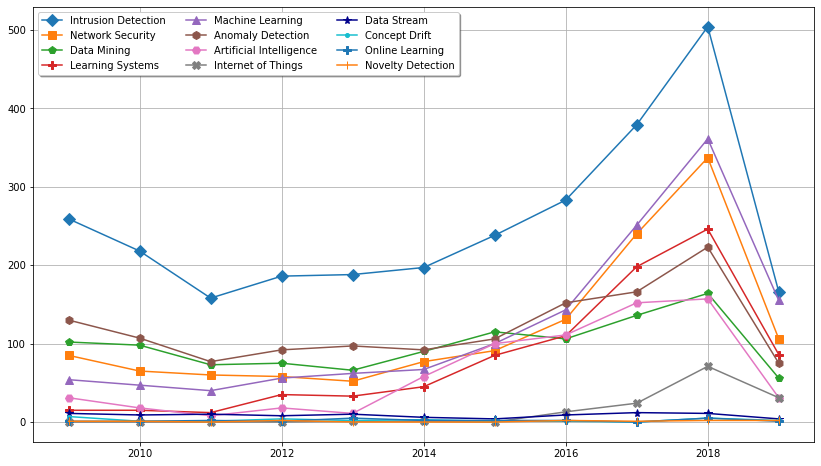

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [56]:
#KTA
fig, ax = plt.subplots(figsize=(14,8))

markers = ['D', 's', 'p', 'P', '^',
          'h', 'H', 'X', '*', '.', 'P', '|']

lines = []
mid = 0
for year, number, kw in rets_kta:
    line, = ax.plot(year, number, label=kw, marker=markers[mid], markersize=8.0)
    lines.append(line)
    mid+=1

lines[8].set_color("darkblue")
ax.legend(loc='upper left', ncol=3, fancybox=True, shadow=True)
ax.grid()
# plt.title("KTA")
plt.show()
fig.savefig('keywordsLINE.eps', format='eps', bbox_inches='tight')

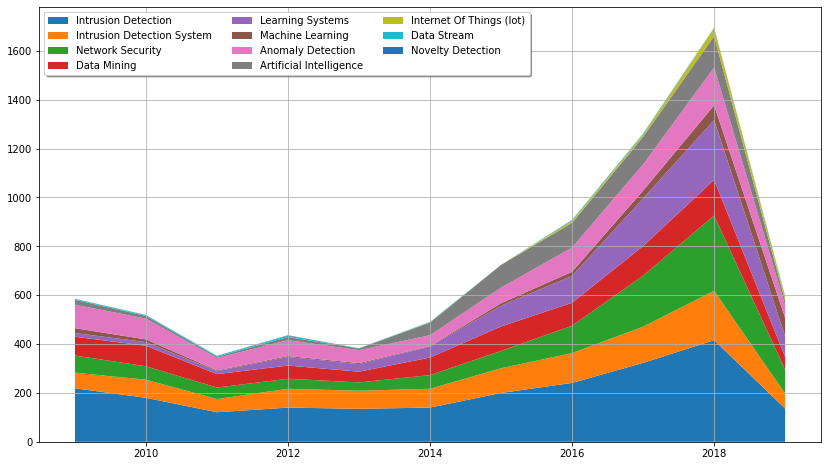

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [57]:
fig, ax = plt.subplots(figsize=(14,8))
x = rets[0][0]
ly = []
labels = []
for _, number, kw in rets:
    ly.append(number)
    labels.append(kw)
y = np.vstack(ly)

ax.stackplot(x, y, labels=labels)
#ax.legend(loc='upper left')
ax.legend(loc='upper left', ncol=3, fancybox=True, shadow=True)
ax.grid()

plt.show()
fig.savefig('keywordsSTACKEDLINE.eps', format='eps', bbox_inches='tight')

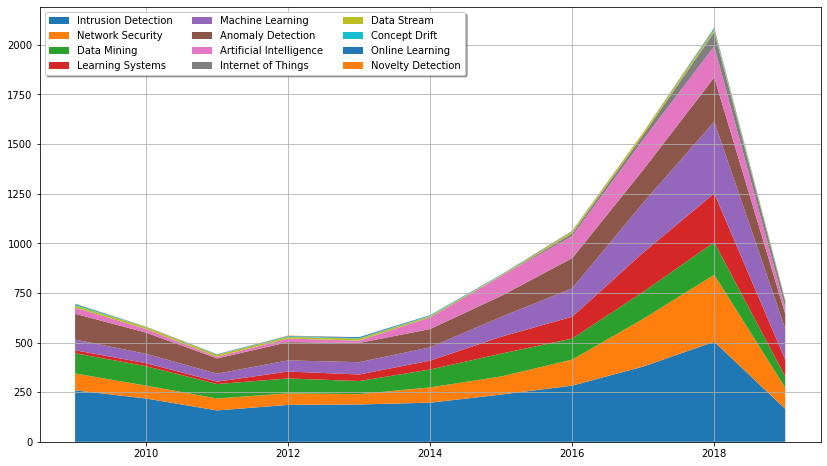

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [58]:
#KTA
fig, ax = plt.subplots(figsize=(14,8))
x = rets[0][0]
ly = []
labels = []
for _, number, kw in rets_kta:
    ly.append(number)
    labels.append(kw)
y = np.vstack(ly)

ax.stackplot(x, y, labels=labels)
#ax.legend(loc='upper left')
ax.legend(loc='upper left', ncol=3, fancybox=True, shadow=True)
ax.grid()
# plt.title("KTA")

plt.show()
fig.savefig('keywordsSTACKEDLINE.eps', format='eps', bbox_inches='tight')

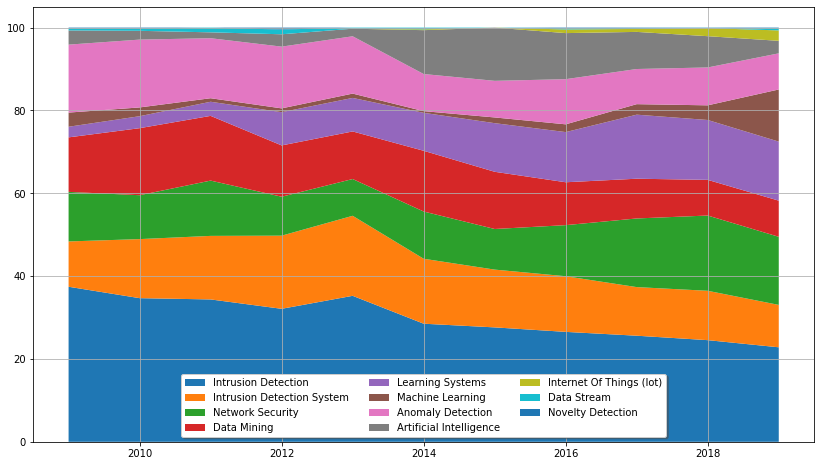

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [59]:
fig, ax = plt.subplots(figsize=(14,8))
x = rets[0][0]
ly = []
labels = []
for _, number, kw in rets:
    ly.append(number)
    labels.append(kw)

import copy
new = copy.deepcopy(ly)    
total = [sum(i) for i in zip(*new)]

for l in new:
    for i in range(len(l)):
        l[i] = ((1.0*l[i])/total[i])*100.0


y = np.vstack(new)
#print(y)

ax.stackplot(x, y, labels=labels)
ax.legend(loc='lower center', ncol=3, fancybox=True, shadow=True)
ax.grid()

plt.show()
fig.savefig('keywordsSTACKEDLINEPERCENT.eps', format='eps', bbox_inches='tight')

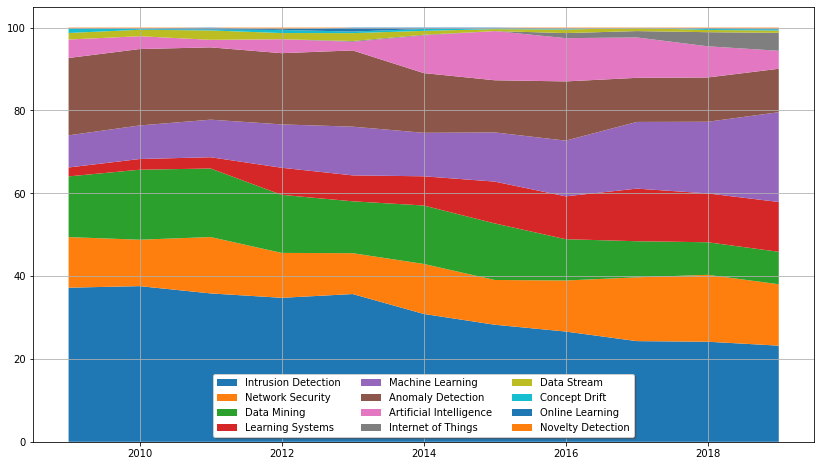

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [60]:
#KTA
fig, ax = plt.subplots(figsize=(14,8))
x = rets[0][0]
ly = []
labels = []
for _, number, kw in rets_kta:
    ly.append(number)
    labels.append(kw)

import copy
new = copy.deepcopy(ly)    
total = [sum(i) for i in zip(*new)]

for l in new:
    for i in range(len(l)):
        l[i] = ((1.0*l[i])/total[i])*100.0


y = np.vstack(new)
#print(y)

ax.stackplot(x, y, labels=labels)
ax.legend(loc='lower center', ncol=3, fancybox=True, shadow=True)
ax.grid()
# plt.title("KTA")

plt.show()
fig.savefig('keywordsSTACKEDLINEPERCENT.eps', format='eps', bbox_inches='tight')

In [61]:
keywords_coocurrences(df, 'intrusion detection', 'data mining')
keywords_coocurrences(df, 'data mining', 'intrusion detection')

keywords_coocurrences_top_n(df, n)

As keywords 'Intrusion Detection' e 'Data Mining' aparecem juntas em 717 trabalhos do(s) ano(s) all years.


As keywords 'Data Mining' e 'Intrusion Detection' aparecem juntas em 717 trabalhos do(s) ano(s) all years.


===== Top 10 coocorrências all years =====
('Intrusion Detection', 'Intrusion Detection System')  -  940
('Computer Crime', 'Intrusion Detection')  -  922
('Intrusion Detection', 'Network Security')  -  911
('Data Mining', 'Intrusion Detection')  -  717
('Anomaly Detection', 'Intrusion Detection')  -  706
('Intrusion Detection', 'Learning Systems')  -  694
('Computer Crime', 'Intrusion Detection System')  -  680
('Computer Crime', 'Network Security')  -  546
('Intrusion Detection System', 'Network Security')  -  518
('Artificial Intelligence', 'Learning Systems')  -  458
('Artificial Intelligence', 'Intrusion Detection')  -  447





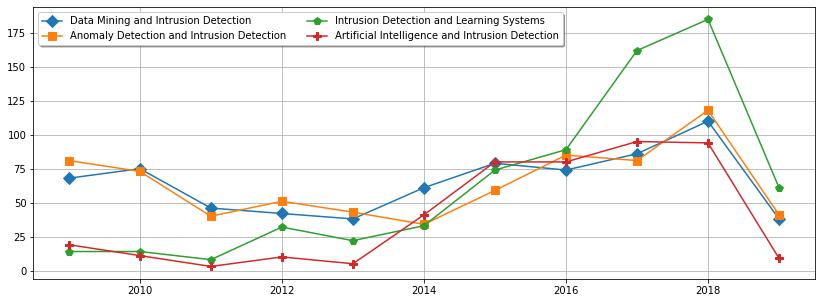

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [62]:
fig, ax = plt.subplots(figsize=(14,5))

l = [('data mining', 'intrusion detection'), ('Anomaly Detection', 'Intrusion Detection'),
    ('Intrusion Detection', 'Learning Systems'), ('Artificial Intelligence', 'Intrusion Detection')]
#,    ('internet of things', 'anomaly detection')


markers = ['D', 's', 'p', 'P', '^',
          'h', 'H', 'X', '*', '.']

sy = 2009
rets = []
for t in l:
    rets.append(keywords_coocurrences_by_year(df, t[0], t[1], sy, returnResult = True))

lines = []
mid = 0
year = list(range(sy, 2020))
for coocu, kw1, kw2 in rets:
    line, = ax.plot(year, coocu, label=kw1.title() + ' and ' + kw2.title(), marker=markers[mid], markersize=8.0)
    lines.append(line)
    mid+=1

#lines[8].set_color("darkblue")
ax.legend(loc='upper left', ncol=2, fancybox=True, shadow=True)
ax.grid()

plt.show()
fig.savefig('keywords_coocurrence_LINE.eps', format='eps', bbox_inches='tight')

In [63]:
keywords_coocurrences_top_n_by_year(df, n, 2009)

===== Top 10 coocorrências year 2009 =====
('Computer Crime', 'Intrusion Detection')  -  90
('Anomaly Detection', 'Intrusion Detection')  -  81
('Data Mining', 'Intrusion Detection')  -  68
('Intrusion Detection', 'Network Security')  -  68
('Intrusion Detection', 'Intrusion Detection System')  -  54
('Internet', 'Intrusion Detection')  -  51
('Computer Crime', 'Intrusion Detection System')  -  50
('Intrusion Detection', 'Security Of Data')  -  46
('Anomaly Detection', 'Computer Crime')  -  46
('Computer Networks', 'Intrusion Detection')  -  44
('Computer Crime', 'Network Security')  -  37



===== Top 10 coocorrências year 2010 =====
('Computer Crime', 'Intrusion Detection')  -  78
('Data Mining', 'Intrusion Detection')  -  75
('Anomaly Detection', 'Intrusion Detection')  -  73
('Intrusion Detection', 'Intrusion Detection System')  -  59
('Computer Crime', 'Intrusion Detection System')  -  56
('Intrusion Detection', 'Network Security')  -  52
('Computer Crime', 'Network Security')  - 

In [64]:
journals_only = df[df.document_type == 'article']
#journals_only
size = len(journals_only)
print('total journals %d' % size)

qta = journals_only.groupby('journal').count().title
t = qta.to_frame()
t['percent'] = ((t['title'] / size) * 100)
print ("============== Top Veículos de Publicação num. papers ==============")
print (t.sort_values(by=['title'], ascending=False).head(10))
print("\n\n\n")

total journals 1078
============== Top Veículos de Publicação num. papers ==============
                                                    title   percent
journal                                                            
IEEE Access                                            49  4.545455
Computers and Security                                 43  3.988868
Security and Communication Networks                    27  2.504638
Expert Systems with Applications                       25  2.319109
Journal of Theoretical and Applied Information ...     21  1.948052
International Journal of Applied Engineering Re...     21  1.948052
Cluster Computing                                      16  1.484230
Future Generation Computer Systems                     14  1.298701
Computer Networks                                      13  1.205937
International Journal of Security and its Appli...     12  1.113173






In [65]:
qta = journals_only.groupby('journal').sum().citations
size = journals_only.groupby('journal').count().title

t = qta.to_frame()

# print(size.sort_values(ascending=False).head(50))
print ("============== Top Veículos de Publicação num. citações ==============")
print (t.sort_values(by=['citations'], ascending=False).head(50))
print("\n\n\n")

============== Top Veículos de Publicação num. citações ==============
                                                    citations
journal                                                      
Computers and Security                                   1361
Expert Systems with Applications                         1252
IEEE Communications Surveys and Tutorials                 603
Information Sciences                                      495
IEEE Transactions on Smart Grid                           412
Journal of Network and Computer Applications              400
Neurocomputing                                            390
Computer Networks                                         278
Knowledge-Based Systems                                   272
Computers and Electrical Engineering                      252
Applied Soft Computing Journal                            239
Future Generation Computer Systems                        236
Pattern Recognition                                       230

In [66]:

mercdf = df[df['keywords'].str.count('Mercury') > 0]
print(len(mercdf))
#mercdf.to_excel('mercurydf.xls')


0


In [67]:
coluna = 'keywords'
keycount = df[pd.notnull(df[coluna])]
list_keywords = keycount[coluna].str.split(';')#.map(Counter).sum()
lista = []
for i in list_keywords:
    for k in i:
        lista.append(k.strip())

count_keyword = Counter(lista).most_common(70)

In [68]:
rets = []
for kw, count in count_keyword:
    rets.append(keyword_usage_by_year(df[['keywords','year']].dropna(), kw, starting_year, ax=None, returndata=True))

In [69]:
for years, number,kw in rets:
    if sum(number[:3]) == 0:
        print(number, kw)
#     print(kw, number)

[0, 0, 0, 0, 0, 12, 8, 30, 43, 60, 15] Big Data
[0, 0, 0, 0, 0, 0, 0, 5, 36, 62, 34] Deep Learning
[0, 0, 0, 0, 1, 1, 0, 12, 23, 64, 26] Internet Of Things
[0, 0, 0, 0, 0, 1, 0, 8, 9, 33, 15] Internet Of Things (Iot)


In [70]:
#get only title, author, journal/conf from the 94 Data Stream papers
#DS papers IDs:
ds_ids = bibd['data stream']
#get a df with only title, author, conf/journal
# df.columns
dsdf = df[['title','author','journal','document_type']]
dsdf = dsdf.loc[ds_ids,:]
len(dsdf)
dsdf_journal = dsdf[dsdf.document_type == 'article']
dsdf_conf = dsdf[dsdf.document_type == 'conference']
dsdf_journal.drop('document_type', axis=1, inplace=True)
dsdf_conf.drop('document_type', axis=1, inplace=True)
len(dsdf_journal), len(dsdf_conf)
dsdf_journal.sort_values(by=['journal']).to_csv('DS_journals.csv')
dsdf_conf.sort_values(by=['journal']).to_csv('DS_confs.csv')

/home/cassales/.local/lib/python3.8/site-packages/pandas/core/frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


starting_year = 2009

kws = ['intrusion detection', 'intrusion detection system', 'Network security', 'Data mining', 
       'Learning systems', 'machine learning', 'Anomaly detection', 'artificial intelligence', 
   y    'internet of things', 'data stream']


rets = []
for kw in kws:
    rets.append(keyword_usage_by_year(df[['keywords','year']].dropna(), kw, starting_year, ax=None, returndata=True))

Data Stream + online learning + concept drift
data stream + palavras chaves mais interessantes

conversar com albert e elaine
qual o próximo passo, o que será desenvolvido?

